In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [2]:
!unzip /content/drive/MyDrive/train_data.zip

Archive:  /content/drive/MyDrive/train_data.zip
replace images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
df = pd.read_csv('train.csv')
df.shape

(12196, 2)

In [4]:
df.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [5]:
df.isna().sum()

,0
image_names,0
class,0


In [6]:
X = []
for img in df.image_names.values:
  temp = plt.imread('images/'+img)
  X.append(temp)

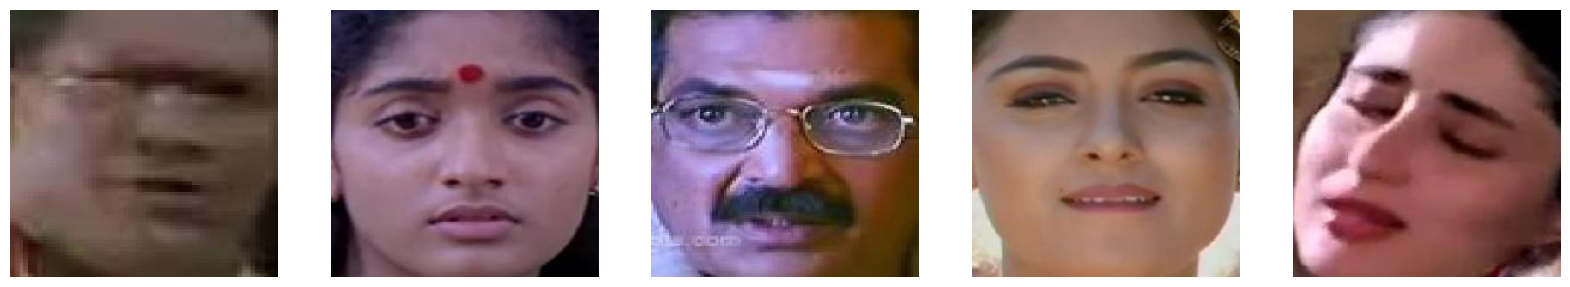

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

In [8]:
X = np.array(X)
X.shape

(12196, 224, 224, 3)

In [9]:
y = df['class'].values
y.shape

(12196,)

In [10]:
X.min(), X.max()

(np.uint8(0), np.uint8(255))

In [11]:
X = X.astype('float32')
X /= X.max()
X.min(), X.max()

(np.float32(0.0), np.float32(1.0))

In [12]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [13]:
df['class'].value_counts()

,count
class,
1,6174
0,6022


In [14]:
model = Sequential()

In [15]:
model.add(InputLayer(shape=(X.shape[1], )))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=50)